In [1]:
pip install seaborn --upgrade


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   -------------- ----------------------- 112.6/294.9 kB 504.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 504.4 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 525.1 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 656.0 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/294.9 kB 605.3 kB/s eta 0:00:01
   --------------------------------------

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("C:/Users/hp/Downloads/Political.csv")

In [4]:
print(df.head())

   Year Registered voters/turnout Total Votes  Turnout percentage
0  2002                10,451,150   5,975,910           57.179449
1  2007                14,296,180   9,877,028           69.088582
2  2012                14,352,533  12,330,028           85.908376
3  2017                19,611,423  15,593,050           79.510039
4  2022                22,120,458  14,326,641           64.766475


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5 non-null      int64  
 1   Registered voters/turnout  5 non-null      object 
 2   Total Votes                5 non-null      object 
 3   Turnout percentage         5 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes
None


In [6]:
print(df.describe())


              Year  Turnout percentage
count     5.000000            5.000000
mean   2012.000000           71.290584
std       7.905694           11.486690
min    2002.000000           57.179449
25%    2007.000000           64.766475
50%    2012.000000           69.088582
75%    2017.000000           79.510039
max    2022.000000           85.908376


In [7]:
print(df.columns)

Index(['Year', 'Registered voters/turnout', 'Total Votes',
       'Turnout percentage'],
      dtype='object')


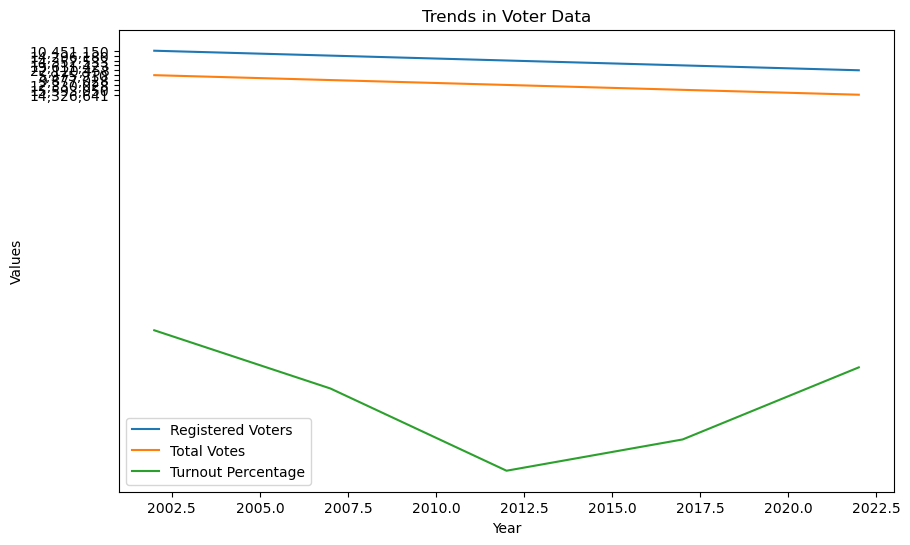

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Registered voters/turnout', label='Registered Voters')
sns.lineplot(data=df, x='Year', y='Total Votes', label='Total Votes')
sns.lineplot(data=df, x='Year', y='Turnout percentage', label='Turnout Percentage')
plt.title('Trends in Voter Data')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

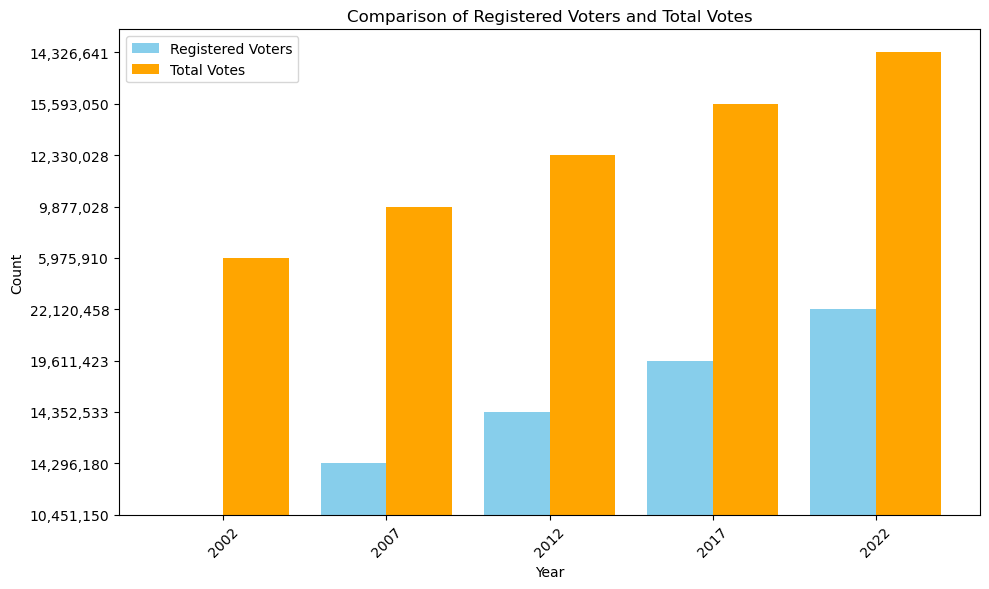

In [20]:
plt.figure(figsize=(10, 6))
width = 0.4  # Width of bars
x = range(len(df['Year']))

# Plot bars
plt.bar([p - width/2 for p in x], df['Registered voters/turnout'], width=width, label='Registered Voters', color='skyblue')
plt.bar([p + width/2 for p in x], df['Total Votes'], width=width, label='Total Votes', color='orange')

# Add labels and title
plt.xticks(ticks=x, labels=df['Year'], rotation=45)
plt.title('Comparison of Registered Voters and Total Votes')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


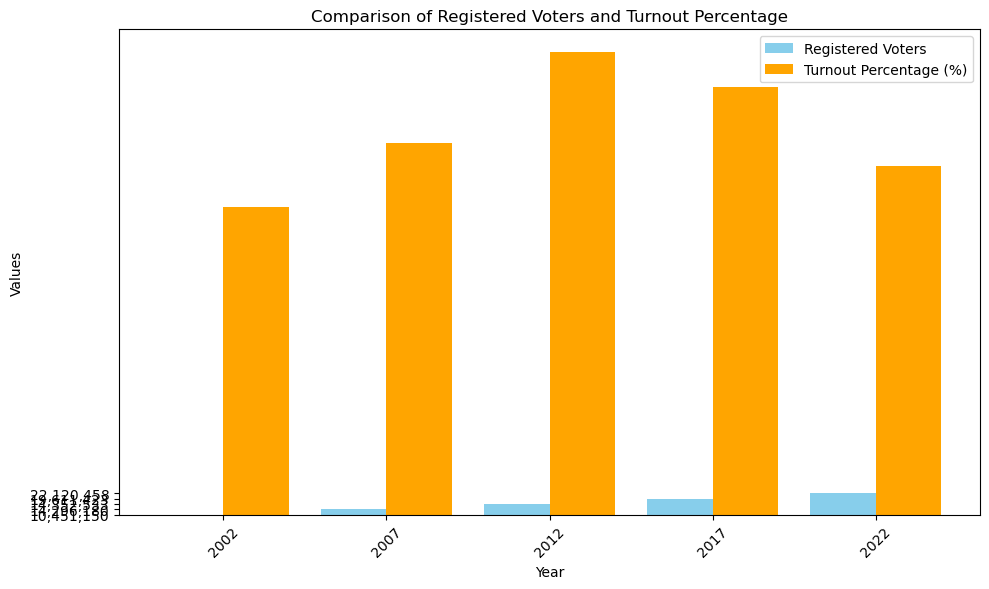

In [21]:
plt.figure(figsize=(10, 6))

# Create bar plot
x = range(len(df['Year']))
width = 0.4
plt.bar([p - width/2 for p in x], df['Registered voters/turnout'], width=width, label='Registered Voters', color='skyblue')
plt.bar([p + width/2 for p in x], df['Turnout percentage'], width=width, label='Turnout Percentage (%)', color='orange')

# Add labels and title
plt.xticks(ticks=x, labels=df['Year'], rotation=45)
plt.title('Comparison of Registered Voters and Turnout Percentage')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()


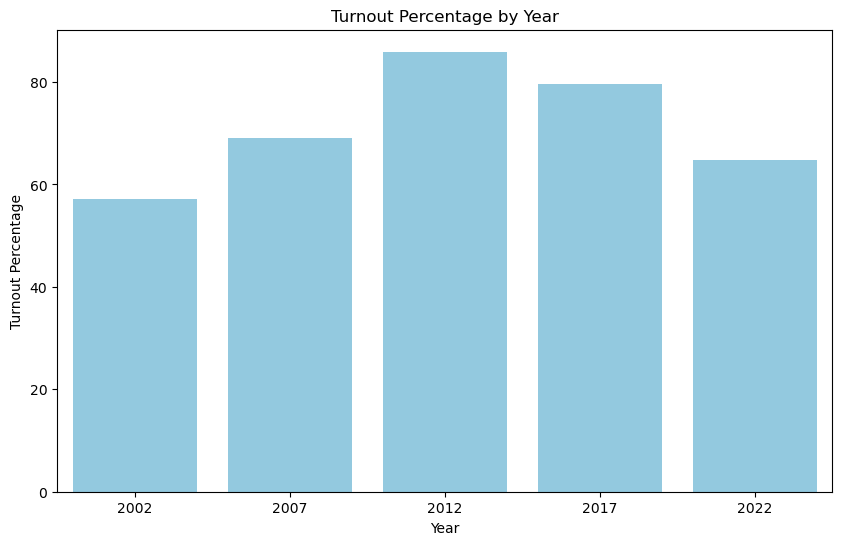

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Year', y='Turnout percentage', color='skyblue')
plt.title('Turnout Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Turnout Percentage')
plt.show()


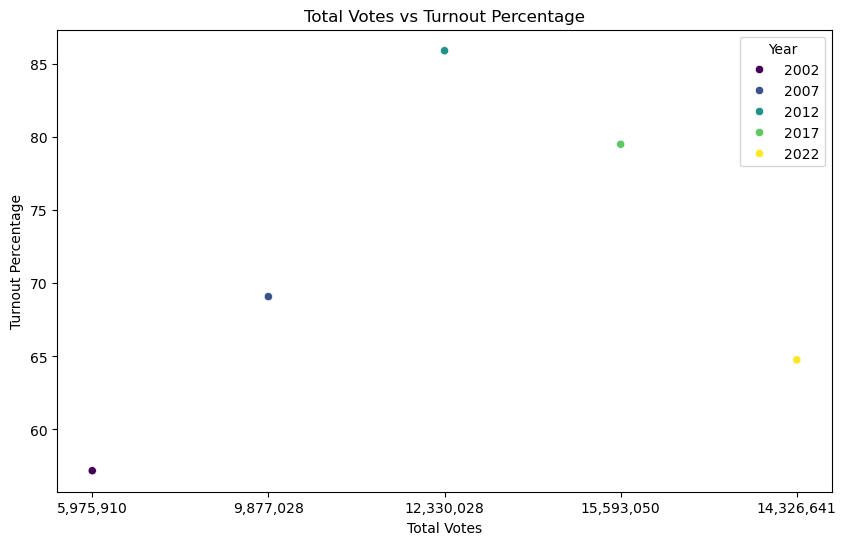

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Votes', y='Turnout percentage', hue='Year', palette='viridis')
plt.title('Total Votes vs Turnout Percentage')
plt.xlabel('Total Votes')
plt.ylabel('Turnout Percentage')
plt.legend(title='Year')
plt.show()


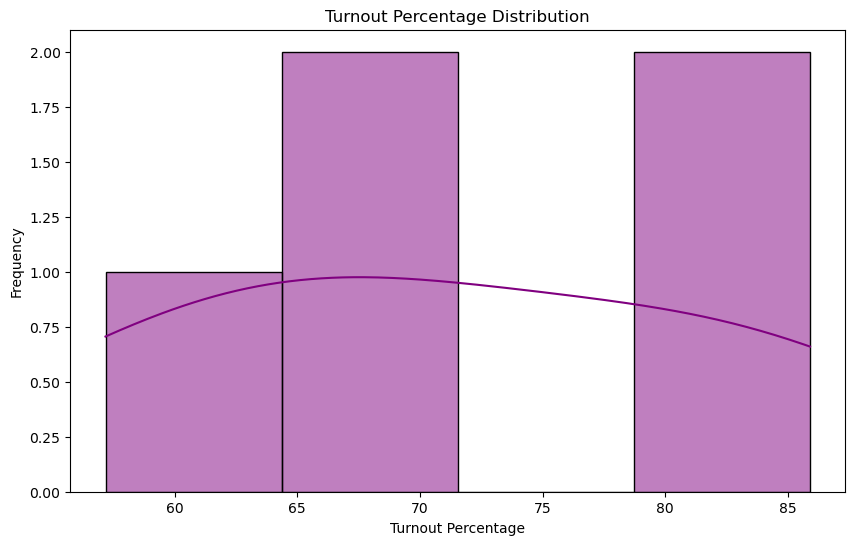

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Turnout percentage', kde=True, color='purple')
plt.title('Turnout Percentage Distribution')
plt.xlabel('Turnout Percentage')
plt.ylabel('Frequency')
plt.show()


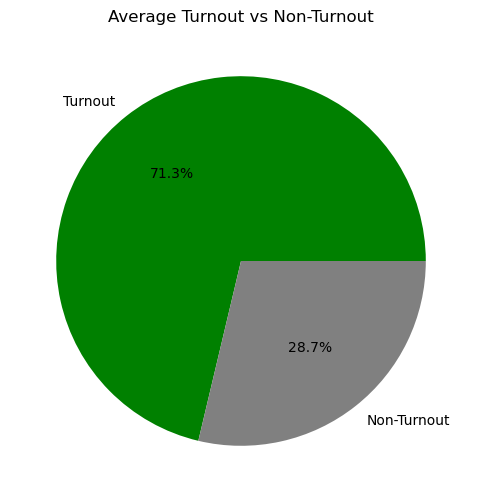

In [14]:
turnout_avg = df['Turnout percentage'].mean()
plt.figure(figsize=(6, 6))
plt.pie([turnout_avg, 100 - turnout_avg], labels=['Turnout', 'Non-Turnout'], autopct='%1.1f%%', colors=['green', 'gray'])
plt.title('Average Turnout vs Non-Turnout')
plt.show()


In [15]:
#Building a prediction model using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Independent (X) and dependent (y) variables
X = df[['Year']]
y = df['Turnout percentage']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Train the model

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Check the model's performance
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [0.52212586]
Model Intercept: -979.3288056310283


In [17]:
#make predictions
# Predict turnout for test data
y_pred = model.predict(X_test)

# Predict for future years
future_years = pd.DataFrame({'Year': [2027, 2032, 2037, 2042]})
future_predictions = model.predict(future_years)

print("Predicted Turnout for Future Years:")
print(future_years.assign(Predicted_Turnout=future_predictions))

Predicted Turnout for Future Years:
   Year  Predicted_Turnout
0  2027          79.020315
1  2032          81.630945
2  2037          84.241574
3  2042          86.852203


In [18]:
#Check the models accuracy
#A smaller value indicates better accurate

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.5107835685713837
Mean Squared Error: 0.26089985392251747


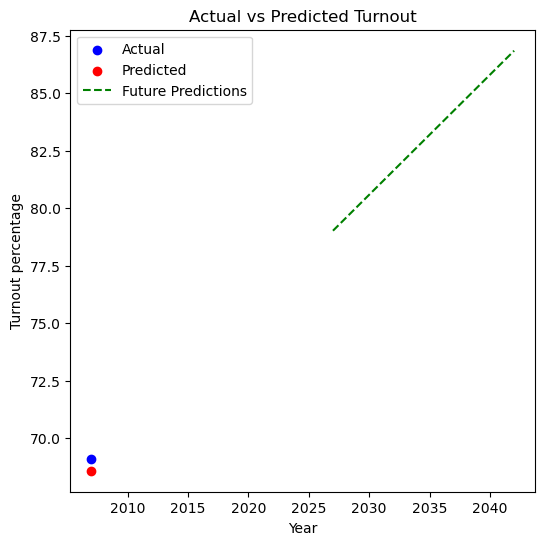

In [19]:
# Plot actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_pred, label='Predicted', color='red')
plt.plot(future_years, future_predictions, label='Future Predictions', linestyle='--', color='green')
plt.title('Actual vs Predicted Turnout')
plt.xlabel('Year')
plt.ylabel('Turnout percentage')
plt.legend()
plt.show()